# Forward Kinematics
To produce the 3D linear piecewise function joining the sensors together, I will experiment with ways of calculating the forward kinematics. 

It will progress likely as this: 
- My initial intuition of how this should work
- Improvements to that (and how other people approach this)
- How matrices can make this process more efficient
- How to interpolate these piecewise functions into a cubic spline

In [ ]:
# import modules
import random
import time # to have a delay in the plotting of the jittery points
import numpy as np
import matplotlib.pyplot as plt
import math

# show 6 3D vectors
# how would this be changed with the parsing of the different channels from the serial? 
vector_list = [(random.uniform(-3, 3), random.uniform(-3, 3), random.uniform(-3, 3)) for i in range(6)]

# attribute a distance to them all
distance_n = [0.2, 0.13, 0.3, 0.22, 0.18] # only 5 distances between the points

# show scaled vectors (to the distances of "n")
magnitude_vector_list = [math.sqrt((vector_list[i][0] ** 2) + (vector_list[i][1] ** 2) + (vector_list[i][2] ** 2)) for i in range(len(vector_list))]
normalised_vector_list = [((vector_list[i][0] / magnitude_vector_list[i]), (vector_list[i][1] / magnitude_vector_list[i]), (vector_list[i][2] / magnitude_vector_list[i])) for i in range(len(vector_list))]

# calculate the base coordinates for each of the vectors
base_0 = [0,0,0] # the origin (an arbitrary invariant (fixed) point)
base_1 = [(normalised_vector_list[0][0]), (normalised_vector_list[0][1]), (normalised_vector_list[0][1])]
base_2 = [(normalised_vector_list[0][0] + normalised_vector_list[1][0]), (normalised_vector_list[0][1] + normalised_vector_list[1][1]), (normalised_vector_list[2][1])]

# plot static graph with vectors
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

"""

ax.quiver(0, 0, 0, vector_list[0][0], vector_list[0][1], vector_list[0][2], color = "b", arrow_length_ratio = 0.05)
ax.quiver(0, 0, 0, vector_list[1][0], vector_list[1][1], vector_list[1][2], color = "r", arrow_length_ratio = 0.05)
ax.quiver(0, 0, 0, vector_list[2][0], vector_list[2][1], vector_list[2][2], color = "g", arrow_length_ratio = 0.05)
ax.quiver(0, 0, 0, vector_list[3][0], vector_list[3][1], vector_list[3][2], color = "k", arrow_length_ratio = 0.05)

"""

ax.quiver(0, 0, 0, normalised_vector_list[0][0], normalised_vector_list[0][1], normalised_vector_list[0][2], color = "b", arrow_length_ratio = 0.05)
ax.quiver(base_1[0], base_1[1], base_1[2], normalised_vector_list[1][0], normalised_vector_list[1][1], normalised_vector_list[1][2], color = "r", arrow_length_ratio = 0.05)
ax.quiver(base_2[0], base_2[1], base_2[2], normalised_vector_list[2][0], normalised_vector_list[2][1], normalised_vector_list[2][2], color = "g", arrow_length_ratio = 0.05)
# ax.quiver(0, 0, 0, normalised_vector_list[3][0], normalised_vector_list[3][1], normalised_vector_list[3][2], color = "k", arrow_length_ratio = 0.05)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title('Vector Positions')


ax.set_proj_type('ortho')
plt.show()

### Issue with first run
Here is a screenshot of this first test:
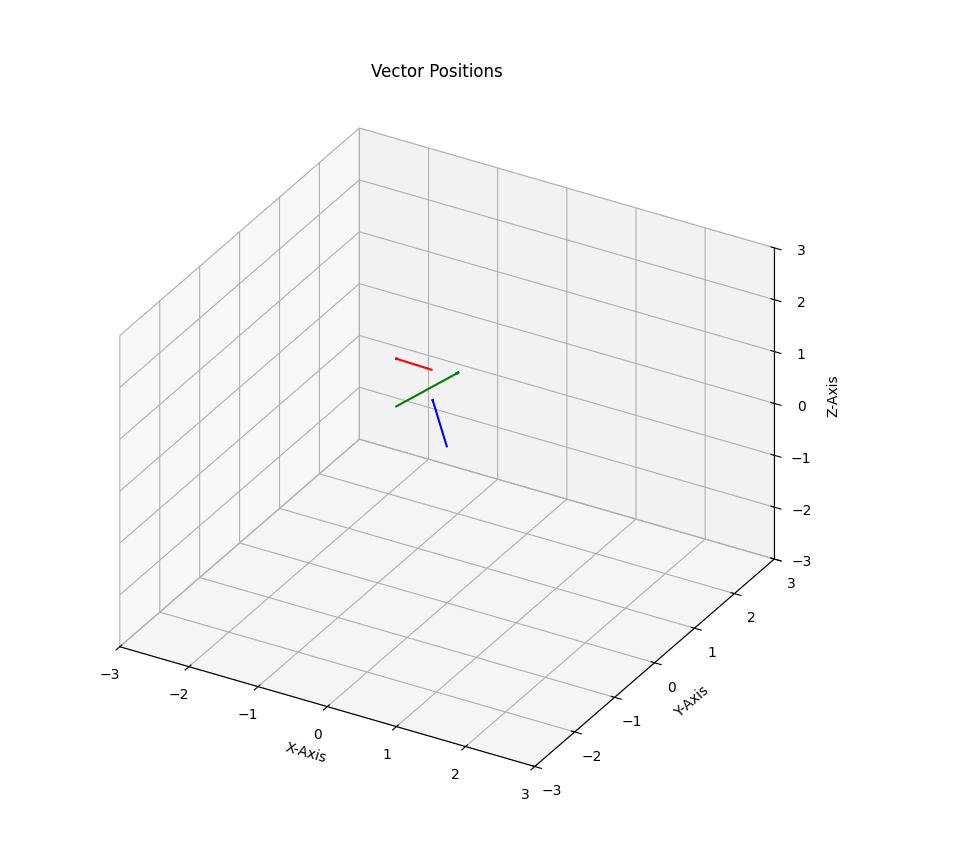
----
Its distribution seems to be random even though the code for where the bases should be seems intuitive. Something to improve on.